Word2Vec is a popular word embedding technique developed by a team of researchers at **Google**, led by **Tomas Mikolov**. It aims to represent words as dense vectors in a continuous vector space where semantically similar words are mapped to nearby points. Word2Vec is widely used in various natural language processing (NLP) tasks due to its ability to capture semantic relationships between words.

There are two main architectures for training Word2Vec models: Continuous Bag of Words (CBOW) and Skip-gram.

1. **Continuous Bag of Words (CBOW)**:
   In the CBOW architecture, the model predicts the current word based on its context, which consists of surrounding words. It tries to maximize the probability of predicting the target word given its context words. CBOW is efficient for smaller datasets and tends to capture global context information.

2. **Skip-gram**:
   Skip-gram, on the other hand, predicts the context words given the current word. It tries to maximize the probability of predicting the context words given the target word. Skip-gram is useful for larger datasets and can capture local context information effectively.

Both CBOW and Skip-gram are trained using a shallow neural network with a single hidden layer. The input layer represents one-hot encoded vectors for words, while the output layer predicts the context or target words. The hidden layer contains the learned word embeddings, which are the dense vector representations of words in the continuous vector space.

During training, Word2Vec learns to adjust the word embeddings such that words with similar meanings or contexts are closer together in the vector space. This allows the model to capture semantic relationships between words, such as synonyms, antonyms, and analogies.

Word2Vec has become a cornerstone in NLP applications, enabling advancements in tasks such as sentiment analysis, named entity recognition, machine translation, and more. It is typically trained on large text corpora to learn high-quality word embeddings that generalize well across different NLP tasks.

In terms of implementation, libraries like Gensim in Python provide efficient tools for training Word2Vec models. These libraries offer functionalities for training Word2Vec models from scratch or using pre-trained embeddings, as well as utilities for exploring and utilizing the learned word embeddings in downstream NLP tasks.

Overall, Word2Vec remains a fundamental technique in NLP, serving as the basis for more advanced embedding models and contributing significantly to the progress of NLP research and applications.

### Data Preprocessing

In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')
import nltk
import string
import re
from nltk.tokenize import sent_tokenize,word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


In [16]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
# prompt: drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Reads 11-0.txt’ file
sample = open("/content/drive/MyDrive/DL_Architecture/Word_Embedding/11-0.txt")
corpus = sample.read()
corpus

"\ufeff\ufeff*** START OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN\nWONDERLAND ***\n[Illustration]\n\n\n\n\nAlice’s Adventures in Wonderland\n\nby Lewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\nContents\n\n CHAPTER I.     Down the Rabbit-Hole\n CHAPTER II.    The Pool of Tears\n CHAPTER III.   A Caucus-Race and a Long Tale\n CHAPTER IV.    The Rabbit Sends in a Little Bill\n CHAPTER V.     Advice from a Caterpillar\n CHAPTER VI.    Pig and Pepper\n CHAPTER VII.   A Mad Tea-Party\n CHAPTER VIII.  The Queen’s Croquet-Ground\n CHAPTER IX.    The Mock Turtle’s Story\n CHAPTER X.     The Lobster Quadrille\n CHAPTER XI.    Who Stole the Tarts?\n CHAPTER XII.   Alice’s Evidence\n\n\n\n\nCHAPTER I.\nDown the Rabbit-Hole\n\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into\nthe book her sister was reading, but it had no pictures or\nconversations in it, “and what is the use of a book,” t

### preprocess text

In [44]:
cleaned_text = re.sub(r'[^\w\s]','',corpus)
cleaned_text

' START OF THE PROJECT GUTENBERG EBOOK ALICES ADVENTURES IN WONDERLAND Illustration Alices Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION 30 Contents CHAPTER I Down the RabbitHole CHAPTER II The Pool of Tears CHAPTER III A CaucusRace and a Long Tale CHAPTER IV The Rabbit Sends in a Little Bill CHAPTER V Advice from a Caterpillar CHAPTER VI Pig and Pepper CHAPTER VII A Mad TeaParty CHAPTER VIII The Queens CroquetGround CHAPTER IX The Mock Turtles Story CHAPTER X The Lobster Quadrille CHAPTER XI Who Stole the Tarts CHAPTER XII Alices Evidence CHAPTER I Down the RabbitHole Alice was beginning to get very tired of sitting by her sister on the bank and of having nothing to do once or twice she had peeped into the book her sister was reading but it had no pictures or conversations in it and what is the use of a book thought Alice without pictures or conversations So she was considering in her own mind as well as she could for the hot day made her feel very sleepy an

In [73]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
import string

# Initialize NLTK components
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation tokens
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Test the preprocessing function with sample text
preprocessed_tokens = preprocess_text(corpus)
print(preprocessed_tokens,end="")


['start', 'project', 'gutenberg', 'ebook', 'alices', 'adventure', 'wonderland', 'illustration', 'alices', 'adventure', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', '30', 'content', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'sends', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparty', 'chapter', 'viii', 'queen', 'croquetground', 'chapter', 'ix', 'mock', 'turtle', 'story', 'chapter', 'x', 'lobster', 'quadrille', 'chapter', 'xi', 'stole', 'tart', 'chapter', 'xii', 'alices', 'evidence', 'chapter', 'rabbithole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'picture', 'conversation', 'use', 'book', 'thought', 'alice', 'without', 'picture', 'conversation', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel'

### Word2Vec model

In [74]:
# Import the Word2Vec class
from gensim.models import Word2Vec

# Define the parameters for the Word2Vec model
# tokens: Tokenized text data for training the model
# vector_size: Dimensionality of the word vectors (e.g., 100 dimensions)
# window: Maximum distance between the current and predicted word within a sentence
# min_count: Minimum frequency count of words to be considered during training
# workers: Number of threads used for training the model
# sg: Training algorithm (0 for CBOW, 1 for Skip-gram)
word2vec = Word2Vec(preprocessed_tokens,
                    vector_size=100,
                    window=5,
                    min_count=1,
                    workers=4,
                    sg=0)


In [ ]:

# # Access the vocabulary of the trained Word2Vec model
# vocabulary = word2vec.wv.key_to_index

# # Print the size of the vocabulary
# print(f"Vocabulary size: {len(vocabulary)}")

# # Access the word embedding vector for a specific word
# word = "king"
# embedding_vector = word2vec.wv[word]

# # Print the shape of the embedding vector
# print(f"Embedding vector shape: {embedding_vector.shape}")

# # Find the most similar words to "king" based on their embedding vectors
# similar_words = word2vec.wv.most_similar(word)

# # Print the most similar words and their similarity scores
# print(f"Most similar words to '{word}':")
# for word, score in similar_words:
#     print(f"\t{word}: {score}")

# # Save the trained Word2Vec model to a file
# model_path = "/content/drive/MyDrive/DL_Architecture/Word_Embedding/word2vec.model"
# word2vec.wv.save(model_path)

# # Load the saved Word2Vec model
# loaded_model = Word2Vec.load(model_path)

# # Access the vocabulary and word embedding vectors of the loaded model
# loaded_vocabulary = loaded_model.wv.key_to_index
# loaded_embedding_vector = loaded_model.wv["king"]

# # Perform further analysis or tasks using the loaded model


### Access Word Vectors


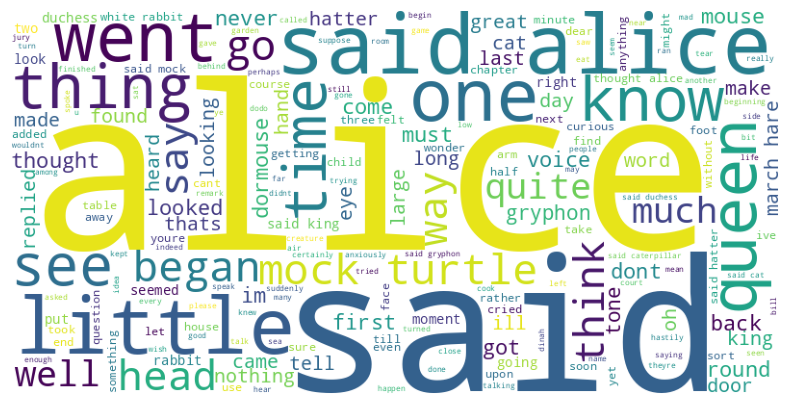

In [82]:
# prompt: word cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(preprocessed_tokens))

# Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### save the model

In [84]:
# Save the Word2Vec model to a file in a specific directory
model_file = "/content/drive/MyDrive/DL_Architecture/Word_Embedding/word2vec_110txt_model.bin"
word2vec.save(model_file)


In [85]:
# prompt: load the model

model = Word2Vec.load("/content/drive/MyDrive/DL_Architecture/Word_Embedding/word2vec_110txt_model.bin")


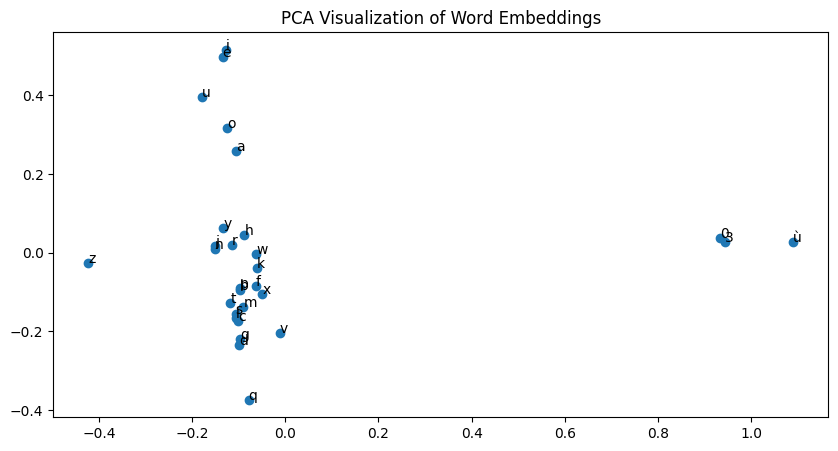

In [87]:

# Import necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract the word embeddings from the Word2Vec model
embeddings = model.wv.vectors

# Perform PCA on the word embeddings
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Plot the PCA-transformed word embeddings
plt.figure(figsize=(10, 5))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1])

# Label the points with the corresponding words
for word, embedding in zip(model.wv.index_to_key, pca_embeddings):
    plt.annotate(word, (embedding[0], embedding[1]))

plt.title("PCA Visualization of Word Embeddings")
plt.show()
